In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | kambove
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | egvekinot
Processing Record 10 of Set 1 | mackay
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | jambi
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | lexington
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | severnyy
Processing Record 19 of Set 1 | viedma
Processing Record 20 of Set 1 | jawhar
Processing Record 21 of Set 1 | kysyl-syr
Processing Record 22 of Set 1 | xingcheng
Processing Record 23 of Set 1 | randvere
City not found

Processing Record 38 of Set 4 | bahir dar
Processing Record 39 of Set 4 | moyo
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | iracoubo
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | rawatsar
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | haverfordwest
Processing Record 47 of Set 4 | acara
Processing Record 48 of Set 4 | novo aripuana
Processing Record 49 of Set 4 | nemuro
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | awbari
Processing Record 3 of Set 5 | cedar city
Processing Record 4 of Set 5 | bac lieu
Processing Record 5 of Set 5 | tuscaloosa
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | victoria falls
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | ciudad guayana
Processing Re

Processing Record 26 of Set 8 | kendari
Processing Record 27 of Set 8 | xifeng
Processing Record 28 of Set 8 | tasiilaq
Processing Record 29 of Set 8 | sobolevo
Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | ahipara
Processing Record 32 of Set 8 | hastings
Processing Record 33 of Set 8 | port augusta
Processing Record 34 of Set 8 | kindu
Processing Record 35 of Set 8 | minbu
Processing Record 36 of Set 8 | aklavik
Processing Record 37 of Set 8 | vestmanna
Processing Record 38 of Set 8 | kirensk
Processing Record 39 of Set 8 | erzin
Processing Record 40 of Set 8 | narsaq
Processing Record 41 of Set 8 | stevens point
Processing Record 42 of Set 8 | ilulissat
Processing Record 43 of Set 8 | pangnirtung
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | gushikawa
Processing Record 47 of Set 8 | katsuura
Processing Record 48 of Set 8 | saint-leu
Processing Record 49 of Set 8 | leticia
Processing Record 50 of S

Processing Record 15 of Set 12 | kudahuvadhoo
Processing Record 16 of Set 12 | vuktyl
Processing Record 17 of Set 12 | lobito
Processing Record 18 of Set 12 | fremont
Processing Record 19 of Set 12 | vanavara
Processing Record 20 of Set 12 | nicoya
Processing Record 21 of Set 12 | coihueco
Processing Record 22 of Set 12 | mercedes
Processing Record 23 of Set 12 | belur
Processing Record 24 of Set 12 | saint-pierre
Processing Record 25 of Set 12 | zharkent
Processing Record 26 of Set 12 | karasjok
Processing Record 27 of Set 12 | kimberley
Processing Record 28 of Set 12 | gariaband
Processing Record 29 of Set 12 | barguzin
Processing Record 30 of Set 12 | xiaoshan
Processing Record 31 of Set 12 | east london
Processing Record 32 of Set 12 | qunduz
Processing Record 33 of Set 12 | ixtapa
Processing Record 34 of Set 12 | saint-joseph
Processing Record 35 of Set 12 | nakamura
Processing Record 36 of Set 12 | el balyana
City not found. Skipping...
Processing Record 37 of Set 12 | datong
Pro

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,61.38,85,0,3.44,ZA,2022-07-05 18:37:49
1,Rikitea,-23.1203,-134.9692,76.05,77,2,17.72,PF,2022-07-05 18:41:07
2,Castro,-24.7911,-50.0119,69.55,55,32,5.46,BR,2022-07-05 18:41:08
3,Hermanus,-34.4187,19.2345,48.79,74,0,1.79,ZA,2022-07-05 18:41:08
4,Qaanaaq,77.4840,-69.3632,46.58,50,88,2.24,GL,2022-07-05 18:41:09
5,Yellowknife,62.4560,-114.3525,72.12,35,0,6.91,CA,2022-07-05 18:41:09
6,Kambove,-10.8764,26.5969,58.14,49,0,4.21,CD,2022-07-05 18:41:10
7,Souillac,-20.5167,57.5167,68.38,77,20,5.75,MU,2022-07-05 18:41:10
8,Egvekinot,66.3167,-179.1667,40.14,95,100,4.09,RU,2022-07-05 18:41:10
9,Mackay,-21.1500,149.2000,48.69,80,4,4.74,AU,2022-07-05 18:41:11


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-07-05 18:37:49,-33.9258,18.4232,61.38,85,0,3.44
1,Rikitea,PF,2022-07-05 18:41:07,-23.1203,-134.9692,76.05,77,2,17.72
2,Castro,BR,2022-07-05 18:41:08,-24.7911,-50.0119,69.55,55,32,5.46
3,Hermanus,ZA,2022-07-05 18:41:08,-34.4187,19.2345,48.79,74,0,1.79
4,Qaanaaq,GL,2022-07-05 18:41:09,77.4840,-69.3632,46.58,50,88,2.24


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

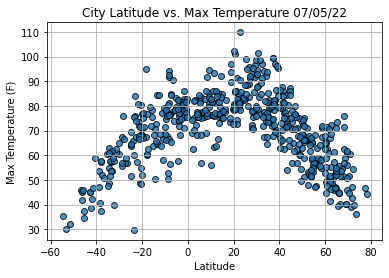

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

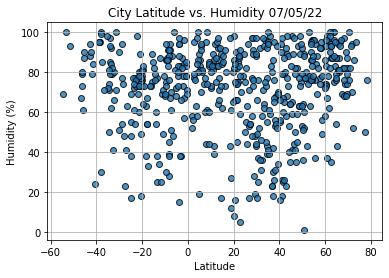

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

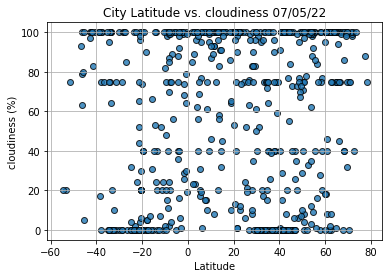

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

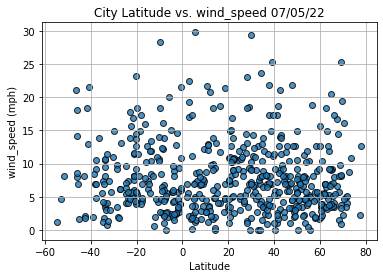

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()